In [1]:
import mne
import matplotlib
import mne_bids
import pathlib
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from mne.time_frequency import psd_welch
from mne.io import concatenate_raws, read_raw_edf

In [2]:
matplotlib.use('Qt5Agg')
%matplotlib qt
mne.viz.set_3d_backend("notebook")
mne.utils.set_config('MNE_USE_CUDA', 'true')  
# mne.set_log_level('warning')

Using notebook 3d backend.



In [3]:
def get_file_list(directory):
    """
    Get list of files of specified directory

    Keyword arguments:
    directory -- destination directory
    """
    lst = []
    for file in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, file)):
            lst.append(str(file))
    return lst

In [4]:
files = get_file_list('emotions')
files

['0000_Fear_006735593.edf',
 '0000_Happyness_005598088.edf',
 '0001_Fear_004065988.edf',
 '0001_Happyness_005636576.edf',
 '0002_Fear_002133977.edf',
 '0002_Happyness_004349780.edf']

In [11]:
raw_data = data.get_data()
print(raw_data[0])

NameError: name 'data' is not defined

In [95]:
main_file = []
iter = 0
for file in files:
    dat = read_raw_edf('emotions/' + file)

    new_annot = True
    annot = mne.Annotations(onset=[], duration=[], description=[])
    for date in range(len(dat['DC-B'][0][0])):
        iter += 1 

        if(iter > 1024 and dat['DC-B'][0][0][date] > 0.0001):
            print(dat['DC-B'][0][0][date])
            iter = 0
            new_annot = False
            annot = annot.append(onset=dat['DC-B'][1][date], duration=0, description=re.search('_[^_]+_', file).group(0))
        else:
            new_annot = True

    dat.set_annotations(annot)
    main_file.append(dat.copy())
main_file = concatenate_raws(main_file)


Extracting EDF parameters from E:\Универ\Мага\2 курс\3 трим\Data\emotions\0000_Fear_006735593.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
0.0002260659494926375
0.0005355706721599145
0.000248191287098497
0.0005080702525368124
Extracting EDF parameters from E:\Универ\Мага\2 курс\3 трим\Data\emotions\0000_Happyness_005598088.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
0.0005684461738002594
0.0003924434882124056
0.0001676900587472343
0.0009805774624246585
Extracting EDF parameters from E:\Универ\Мага\2 курс\3 трим\Data\emotions\0001_Fear_004065988.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
0.0010434534218356601
0.0004756947585259785
Extracting EDF parameters from E:\Универ\Мага\2 курс\3 трим\Data\emotions\0001_Happyness_005636576.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
0.0008690757610437171
0.00040381866

In [96]:
main = main_file

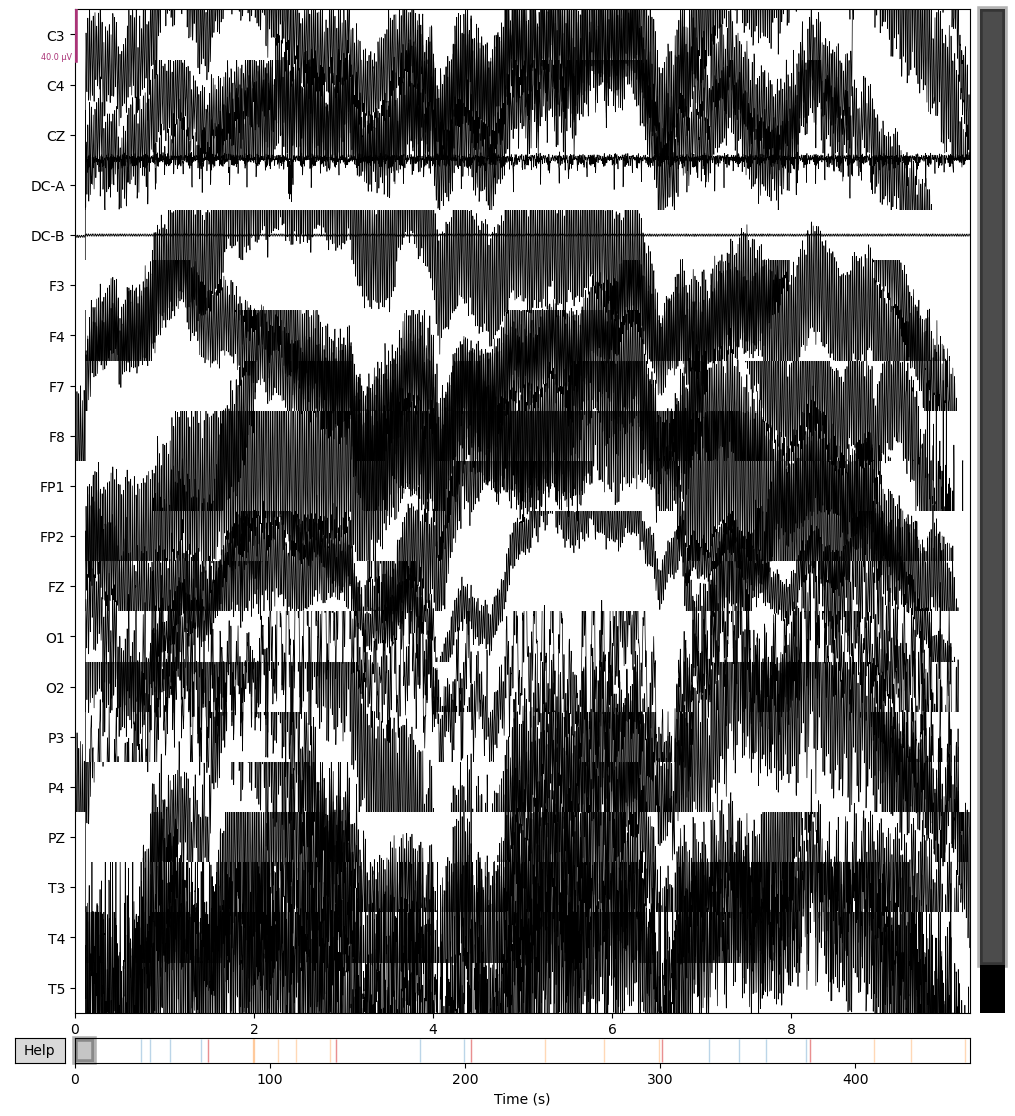

In [35]:
main.plot()

In [97]:
main.save('raw.fif', overwrite=True)

Overwriting existing file.
Writing E:\Универ\Мага\2 курс\3 трим\Data\raw.fif
Closing E:\Универ\Мага\2 курс\3 трим\Data\raw.fif
[done]


In [ ]:
info = dat.info
print(info)

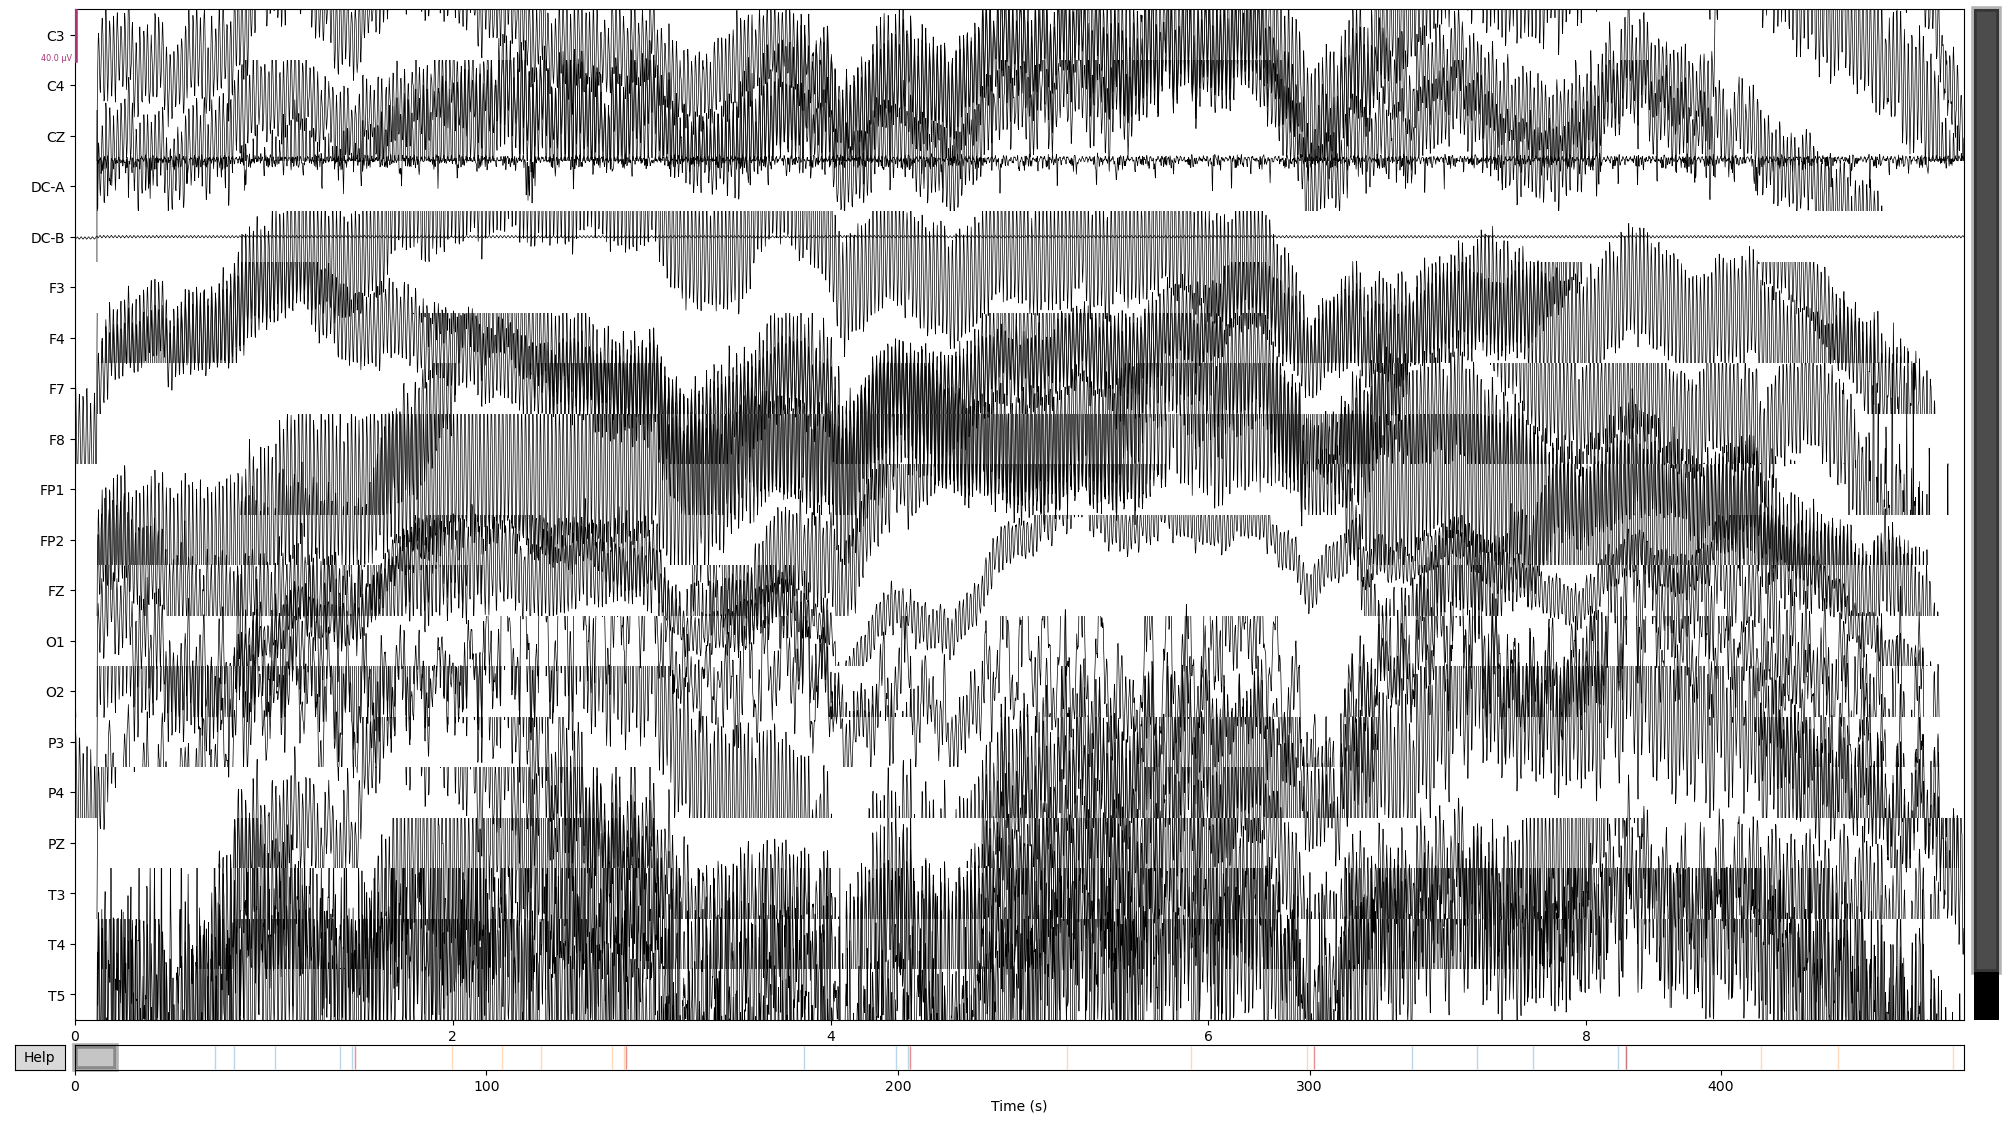

In [9]:
main.plot()

Opening raw data file raw.fif...
Isotrak not found
    Range : 0 ... 235007 =      0.000 ...   458.998 secs
Ready.
Reading 0 ... 235007  =      0.000 ...   458.998 secs...
<Raw | raw.fif, 21 x 235008 (459.0 s), ~37.7 MB, data loaded>
Effective window size : 4.000 (s)
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3381 samples (6.604 sec)

Setting up band-stop filter from 1.5e+02 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- 

<ipython-input-98-a116ae2dc1a4>:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  main.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False)


Effective window size : 4.000 (s)


<ipython-input-98-a116ae2dc1a4>:10: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  main.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False)


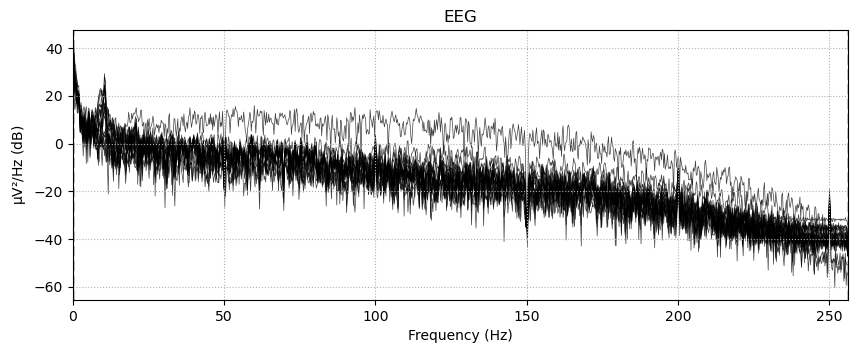

In [98]:

main = mne.io.read_raw_fif('raw.fif', preload = True)

print(main)
picks = mne.pick_types(main.info, eeg=True, exclude=['DC-B', 'DC-A'])
main.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False)
# main_file.preload = True
main.notch_filter(np.arange(50, 150, 250), filter_length='auto', phase='zero')
main.notch_filter(np.arange(150, 200, 250), filter_length='auto', phase='zero')
main.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False)

In [14]:
channels = dat.ch_names
print(len(channels), channels)

21 ['C3', 'C4', 'CZ', 'DC-A', 'DC-B', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FZ', 'O1', 'O2', 'P3', 'P4', 'PZ', 'T3', 'T4', 'T5', 'T6']


Filtering raw data in 6 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 sec)



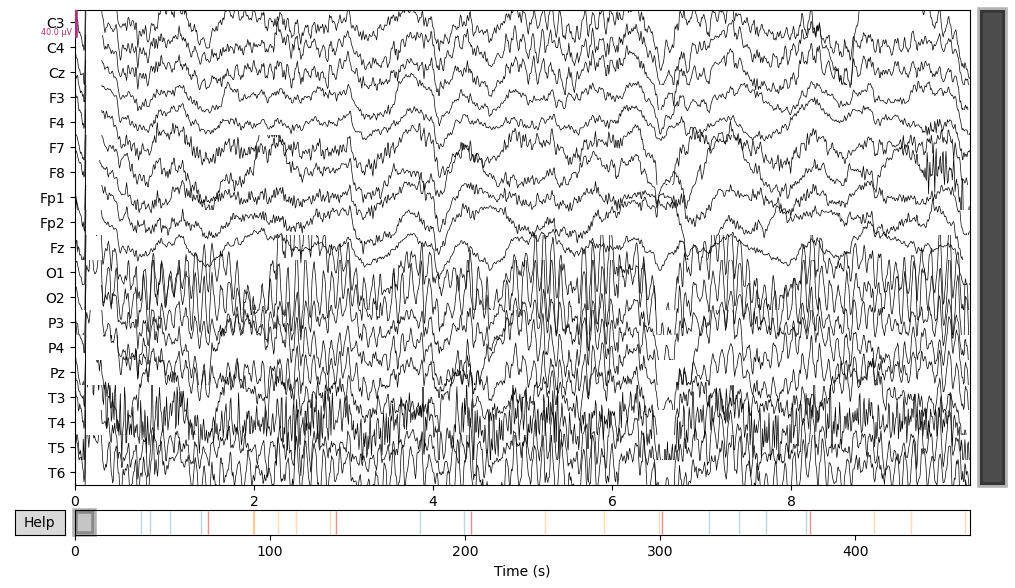

In [99]:
def tit(text):
    return text.title()
main.load_data()
main.rename_channels(tit)
main.drop_channels(['Dc-A', 'Dc-B'])
montage = mne.channels.make_standard_montage('standard_1020')
main.set_montage(montage, verbose=False, on_missing='raise')
main.plot()
eeg_cropped_filtered = main.filter(l_freq=1,h_freq=40)

eeg_cropped_filtered.plot()

Effective window size : 4.000 (s)


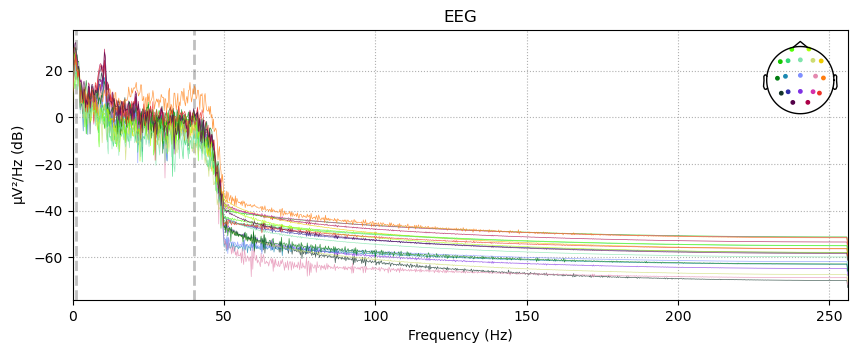

In [80]:
main.plot_psd(area_mode='range', tmax=10.0, average=False)

In [100]:
events, event_id = mne.events_from_annotations(main)



Used Annotations descriptions: ['_Fear_', '_Happyness_']


In [101]:
events, event_id = mne.events_from_annotations(eeg_cropped_filtered)

Used Annotations descriptions: ['_Fear_', '_Happyness_']


In [102]:
tmin = -0.7
tmax = 1.0
baseline = (None, 0)

epochs = mne.Epochs(eeg_cropped_filtered,
                    events=events,
                    event_id=event_id,
                    tmin=tmin,
                    tmax=tmax,
                    baseline=baseline,
                    preload=True)
# epochs


Not setting metadata
Not setting metadata
20 matching events found
Setting baseline interval to [-0.69921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 20 events and 871 original time points ...
0 bad epochs dropped


In [103]:
from sklearn.pipeline import make_pipeline
from mne.decoding import Scaler, Vectorizer, cross_val_multiscore
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import metrics
import numpy as np
cv = KFold(random_state=42, shuffle= True)
epochs_dif = epochs['_Fear_', '_Happyness_']

epochs_dif
# epochs_dif1



epochs_anger_eeg = epochs_dif.copy().pick_types(eeg=True)
X = epochs_anger_eeg.get_data()
y = epochs_anger_eeg.events[:,2]
X.shape
# y
# epochs.events

Scaler(epochs_anger_eeg.info)

clf = make_pipeline(
    Scaler(epochs_anger_eeg.info),
  
    Vectorizer(),
    # And, finally, the actual classifier.
    SVC(kernel='rbf'))
# clf
n_splits = 5
scoring = 'roc_auc'
scores = cross_val_multiscore(clf, X, y, cv=n_splits, scoring='roc_auc')

roc_auc_mean = round(np.mean(scores), 3)
roc_auc_std = round(np.std(scores), 3)

print(f'CV scores: {scores}')
print(f'Mean ROC AUC = {roc_auc_mean:.3f} (SD = {roc_auc_std:.3f})')

clf.fit(X,y)



CV scores: [0.25 1.   0.25 0.75 0.75]
Mean ROC AUC = 0.600 (SD = 0.300)


Pipeline(steps=[('scaler',
                 Scaler(info=<Info | 10 non-empty values
 bads: []
 ch_names: C3, C4, Cz, F3, F4, F7, F8, Fp1, Fp2, Fz, O1, O2, P3, P4, Pz, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2021-06-04 06:07:20 UTC
 meas_id: 4 items (dict)
 nchan: 19
 projs: []
 sfreq: 512.0 Hz
>,
    scalings=None, with_mean=True, with_std=True)),
                ('vectorizer',
                 <mne.decoding.transformer.Vectorizer object at 0x00000228E9AC8460>),
                ('svc', SVC())])

In [105]:
metrics.plot_roc_curve(clf, X, y)  
plt.show()   

В предыдущих примерах мы обучили классификатор различать экспериментальные условия, используя пространственно-временные паттерны всех испытаний. Следовательно, классификатор был (надеюсь!) В состоянии предсказать, какие шаблоны активации принадлежат какому состоянию.

Тем не менее, интересная нейробиология: когда именно различаются сигналы мозга для двух состояний?

Мы можем попытаться ответить на этот вопрос, установив классификатор в каждый конкретный момент времени. Если классификатор сможет успешно различать эти два состояния, мы можем сделать вывод, что пространственные паттерны активации, измеренные датчиками МЭГ или ЭЭГ, в этот самый момент времени различались

In [87]:
from sklearn.preprocessing import StandardScaler
from mne.decoding import SlidingEstimator

# First, create X and y.
epochs_anger_eeg = epochs_dif.copy().pick_types(eeg=True, exclude=['DC-B', 'DC-A'])
X = epochs_anger_eeg.get_data()
y = epochs_anger_eeg.events[:, 2]

# Classifier pipeline. No need for vectorization as in the previous example.
clf = make_pipeline(StandardScaler(),
                    LogisticRegression())

# The "sliding estimator" will train the classifier at each time point.
scoring = 'roc_auc'
time_decoder = SlidingEstimator(clf, scoring=scoring, n_jobs=1, verbose=True)

# Run cross-validation.
n_splits = 5
scores = cross_val_multiscore(time_decoder, X, y, cv=5, n_jobs=1)

# Mean scores across cross-validation splits, for each time point.
mean_scores = np.mean(scores, axis=0)

# Mean score across all time points.
mean_across_all_times = round(np.mean(scores), 3)
print(f'\n=> Mean CV score across all time points: {mean_across_all_times:.3f}')

  0%|          | Fitting SlidingEstimator : 0/871 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/871 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/871 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/871 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/871 [00:00<?,       ?it/s]


=> Mean CV score across all time points: 0.582


In [88]:
fig, ax = plt.subplots()

ax.axhline(0.5, color='k', linestyle='--', label='chance')  # AUC = 0.5
ax.axvline(0, color='k', linestyle='-')  # Mark time point zero.
ax.plot(epochs.times, mean_scores, label='score')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Mean ROC AUC')
ax.legend()
ax.set_title('злость vs сострадание')
fig.suptitle('Sensor Space Decoding')

Text(0.5, 0.98, 'Sensor Space Decoding')

In [89]:
from mne.decoding import PSDEstimator
psd = PSDEstimator(2 * np.pi, 1, np.inf)
epochs_data = epochs_anger_eeg.get_data()
X = psd.fit_transform(epochs_data, y)
# X

    Using multitaper spectrum estimation with 7 DPSS windows


In [106]:
print(X.shape[0] == epochs_data.shape[0])
psd.fit(epochs_data, y).transform(epochs_data)


True
    Using multitaper spectrum estimation with 7 DPSS windows


array([[[2.62135464e-13, 2.58034233e-13, 2.55087981e-13, ...,
         6.05388661e-14, 6.05359408e-14, 6.05339674e-14],
        [4.52217819e-13, 4.45127760e-13, 4.39983053e-13, ...,
         1.04031796e-13, 1.04024349e-13, 1.04021009e-13],
        [2.74201245e-13, 2.69643209e-13, 2.66630539e-13, ...,
         6.42735456e-14, 6.42704396e-14, 6.42686892e-14],
        ...,
        [2.29957756e-13, 2.23016987e-13, 2.19690589e-13, ...,
         4.94750404e-14, 4.94754756e-14, 4.94738182e-14],
        [1.77218342e-12, 1.74798911e-12, 1.72458974e-12, ...,
         3.84126850e-13, 3.84107381e-13, 3.84095737e-13],
        [1.37404586e-12, 1.35626903e-12, 1.34162771e-12, ...,
         3.13099733e-13, 3.13082421e-13, 3.13073802e-13]],

       [[7.55640474e-14, 7.38141845e-14, 7.37122222e-14, ...,
         1.88145115e-14, 1.88139338e-14, 1.88126980e-14],
        [9.11753265e-14, 8.90993506e-14, 8.80869756e-14, ...,
         1.88208206e-14, 1.88212104e-14, 1.88205778e-14],
        [3.40766002e-14, 

In [107]:
epochs_dif.info


<Info | 10 non-empty values
 bads: []
 ch_names: C3, C4, Cz, F3, F4, F7, F8, Fp1, Fp2, Fz, O1, O2, P3, P4, Pz, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2021-06-04 06:07:20 UTC
 meas_id: 4 items (dict)
 nchan: 19
 projs: []
 sfreq: 512.0 Hz
>

In [108]:
def eeg_power_band(epochs):
    """EEG relative power band feature extraction.

    This function takes an ``mne.Epochs`` object and creates EEG features based
    on relative power in specific frequency bands that are compatible with
    scikit-learn.

    Parameters
    ----------
    epochs : Epochs
        The data.

    Returns
    -------
    X : numpy array of shape [n_samples, 5]
        Transformed data.
    """
    # specific frequency bands
    FREQ_BANDS = {"delta": [0.5, 4.5],
                  "theta": [4.5, 8.5],
                  "alpha": [8.5, 11.5],
                  "sigma": [11.5, 15.5],
                  "beta": [15.5, 30.],
                 "gamma": [30., 45.]}

    psds, freqs = psd_welch(epochs_dif, picks='eeg', fmin=0.5, fmax=40.)
    # Normalize the PSDs
    psds /= np.sum(psds, axis=-1, keepdims=True)

    X = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_band = psds[:, :, (freqs >= fmin) & (freqs < fmax)].mean(axis=-1)
        X.append(psds_band.reshape(len(psds), -1))

    return np.concatenate(X, axis=1)

In [109]:
# epochs_dif = epochs_dif.drop_channels(['DC-B', 'DC-A'])
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
pipe = make_pipeline(FunctionTransformer(eeg_power_band, validate=False),
                     SVC(kernel='rbf'))
#                     RandomForestClassifier(n_estimators=100, random_state=42))

# Train
y = epochs_dif.events[:, 2]
pipe.fit(epochs_dif, y)

# Test
y_pred = pipe.predict(epochs_dif)

# Assess the results
# y_test = epochs_test.events[:, 2]
acc = accuracy_score(y, y_pred)

print("Accuracy score: {}".format(acc))

Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Accuracy score: 0.65


In [110]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[9 1]
 [6 4]]


In [111]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, target_names=epochs_dif.event_id.keys()))

              precision    recall  f1-score   support

      _Fear_       0.60      0.90      0.72        10
 _Happyness_       0.80      0.40      0.53        10

    accuracy                           0.65        20
   macro avg       0.70      0.65      0.63        20
weighted avg       0.70      0.65      0.63        20

Channels marked as bad: none
Channels marked as bad: none


H:\Programs\Anaconda\envs\mne\lib\site-packages\mne\viz\misc.py:707: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000022882B88970> has a label of '_Happyness_ (10)' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5),
H:\Programs\Anaconda\envs\mne\lib\site-packages\mne\viz\misc.py:707: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000022882B885E0> has a label of '_Fear_ (10)' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5),


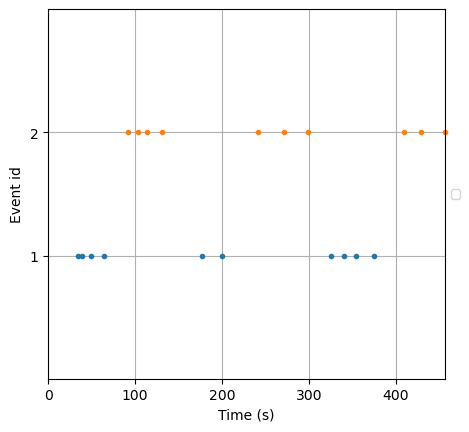

In [112]:
mne.viz.plot_events(events, event_id=event_id, sfreq=eeg_cropped_filtered.info['sfreq'])

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)

main.plot_psd(ax=ax[0], show=False)
eeg_cropped_filtered.plot_psd(ax=ax[1], show=False)

ax[0].set_title('PSD before filtering')
ax[1].set_title('PSD after filtering')
ax[1].set_xlabel('Frequency (Hz)')
# fig.set_tight_layout(True)
plt.show()

Effective window size : 4.000 (s)
Effective window size : 4.000 (s)


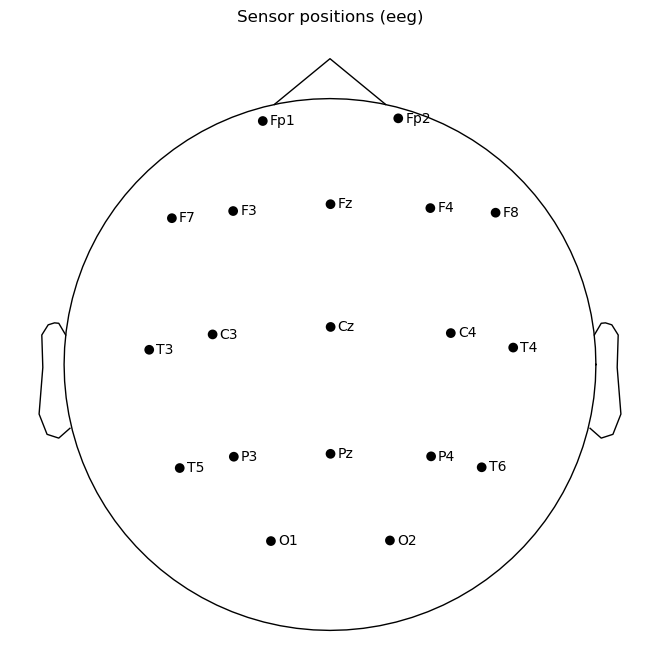

In [61]:
# 
main.plot_sensors( ch_type='eeg',show_names=True)

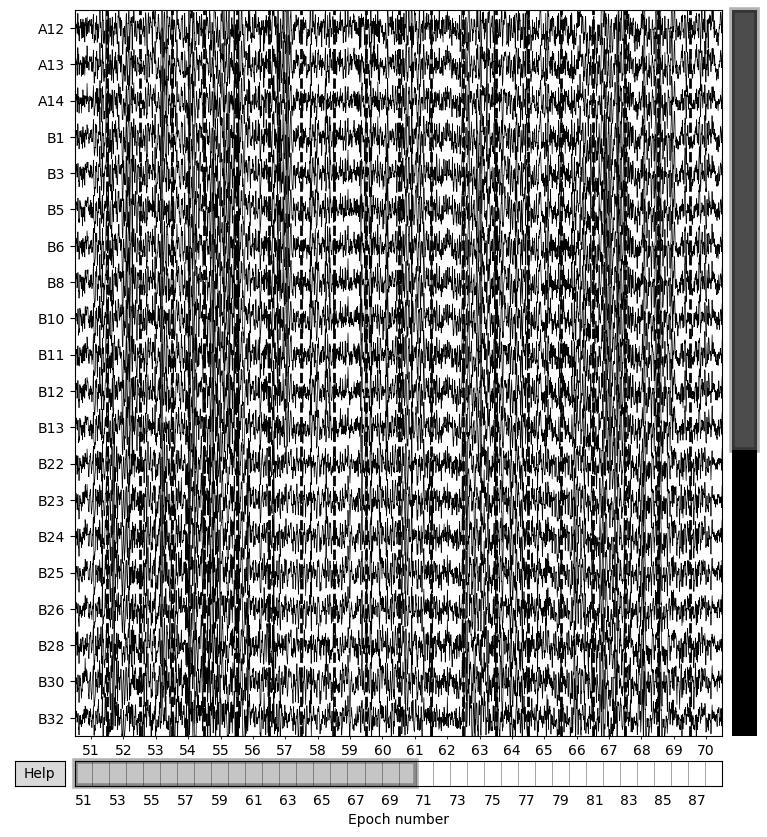

In [68]:
epochs['anger_'].plot()

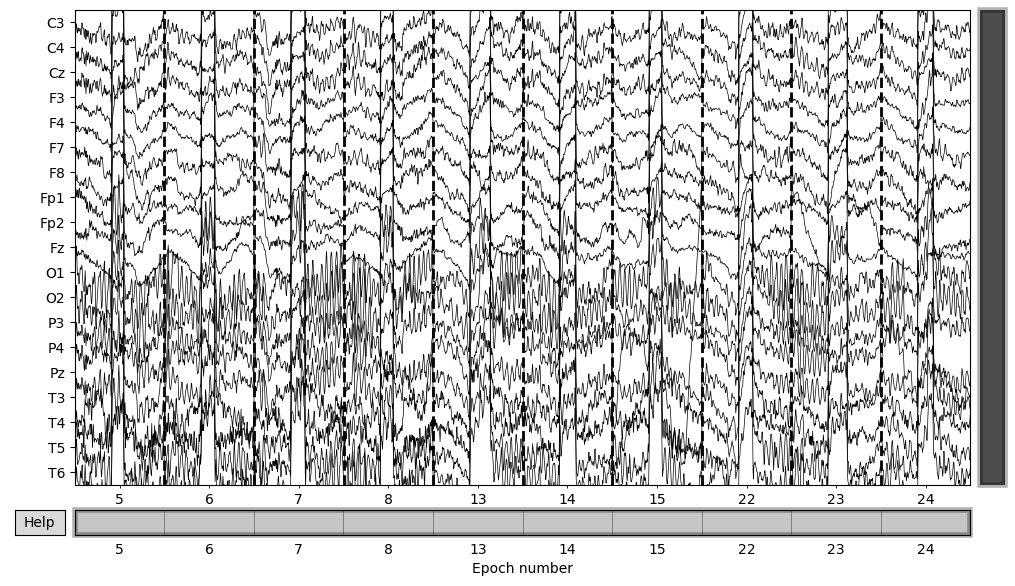

Dropped 0 epochs: 
Channels marked as bad: none
Dropped 0 epochs: 
Channels marked as bad: none


In [66]:
epochs['_Fear_'].plot()
epochs['_Happyness_'].plot()

In [70]:
epochs.save('epochs_epo.fif', overwrite=True)

Overwriting existing file.


In [67]:
evoked_anger = epochs['_Fear_'].average()
evoked_happy = epochs['_Happyness_'].average()

In [74]:
mne.viz.plot_compare_evokeds([evoked_anger,evoked_happy], picks='eeg')

combining channels using "gfp"
combining channels using "gfp"


H:\Programs\Anaconda\envs\mne\lib\site-packages\mne\viz\evoked.py:1829: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000228D9D71760> has a label of '_Fear_' which cannot be automatically added to the legend.
  ax.legend(lines, labels, **legend_params)
H:\Programs\Anaconda\envs\mne\lib\site-packages\mne\viz\evoked.py:1829: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000228DE74A7F0> has a label of '_Happyness_' which cannot be automatically added to the legend.
  ax.legend(lines, labels, **legend_params)


[<Figure size 800x600 with 1 Axes>]

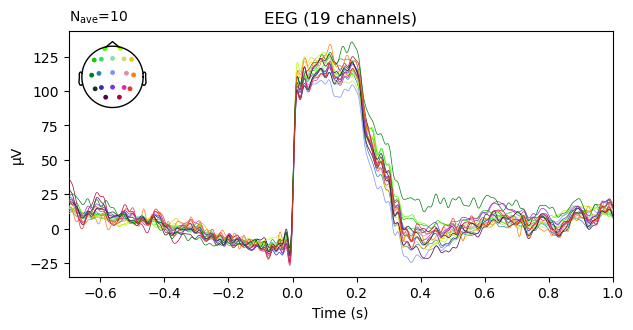

In [77]:
evoked_happy.plot(spatial_colors=True)
evoked_anger.plot(spatial_colors=True)

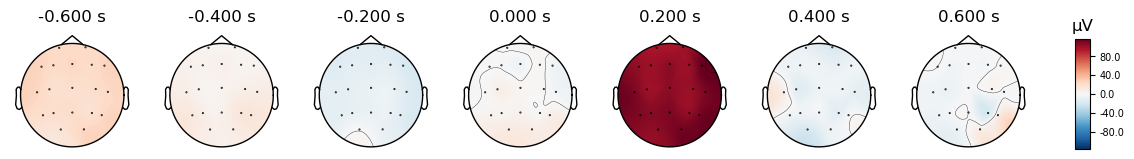

In [87]:
# evoked_anger.plot_topomap(ch_type='eeg', times = [-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6])
evoked_happy.plot_topomap(ch_type='eeg', times = [-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6])

No projector specified for this dataset. Please consider the method self.add_proj.


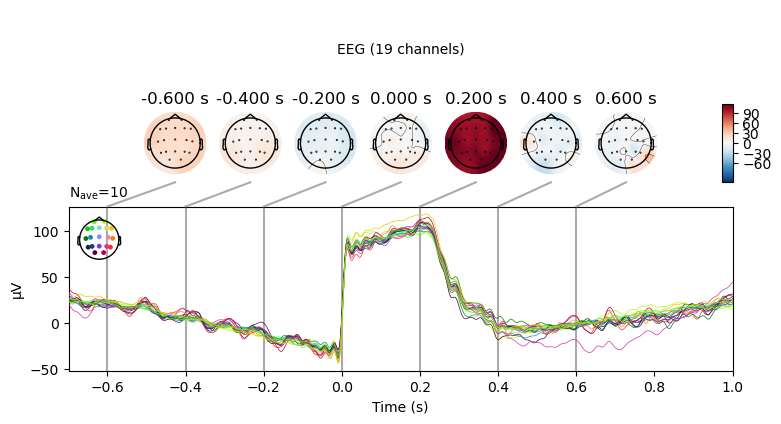

In [88]:
evoked_happy.plot_joint(picks='eeg', times = [-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6])

In [89]:
mne.viz.plot_compare_evokeds([evoked_anger,evoked_happy], picks='eeg')

NameError: name 'evoked_anger' is not defined

In [76]:
mne.write_evokeds(fname='evokeds_ave.fif',
                  evoked=[evoked_anger,evoked_happy])

In [90]:

epochs_ica = mne.Epochs(data_exec,
                        events=events,
                        event_id=event_id,
                        tmin=epochs.tmin,
                        tmax=epochs.tmax,
                        baseline=baseline,
                        preload=True)

NameError: name 'data_exec' is not defined

In [78]:
epochs_ica.info

<Info | 8 non-empty values
 bads: []
 ch_names: A12, A13, A14, B1, B3, B5, B6, B8, B10, B11, B12, B13, B22, B23, ...
 chs: 33 EEG, 1 EOG
 custom_ref_applied: False
 dig: 224 items (224 EEG)
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: unspecified
 nchan: 34
 projs: []
 sfreq: 256.0 Hz
>

In [52]:
n_components = 0.999  # Should normally be higher, like 0.999!!
method = 'picard'
max_iter = 1000  # Should normally be higher, like 500 or even 1000!!
fit_params = dict(fastica_it=5)
random_state = 42

ica = mne.preprocessing.ICA(n_components=n_components,
#     max_pca_components=33,
                            method=method,
                            max_iter=max_iter,
                            fit_params=fit_params,
                            random_state=random_state)
ica.fit(epochs)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by explained variance: 18 components
Fitting ICA took 0.5s.


<ICA | epochs decomposition, fit (picard): 17420 samples, 18 components, channels used: "eeg">

In [53]:
ica.plot_components(inst=epochs)

[<MNEFigure size 975x967 with 18 Axes>]

In [81]:
# data_exec = data1.copy().pick_channels(ch_names=['EXG1','EXG2'])

In [54]:
# ecg_epochs = mne.preprocessing.create_ecg_epochs(data1, reject=None,
#                                                  baseline=(None, -0.2),
#                                                  tmin=-0.5, tmax=0.5)
# ecg_evoked = ecg_epochs.average()
# ecg_inds, ecg_scores = ica.find_bads_ecg(
#     ecg_epochs, method='ctps')


eog_evoked = epochs.average()
eog_inds, eog_scores = ica.find_bads_eog(
    epochs)

# components_to_exclude = ecg_inds + eog_inds
ica.exclude = eog_inds#components_to_exclude

No EOG channels found
Trying with EEG 061 and EEG 062


RuntimeError: EEG 61 or EEG 62 channel not found !!

In [55]:
ica.exclude

[]

In [94]:
ica.plot_scores(eog_scores)

NameError: name 'eog_scores' is not defined

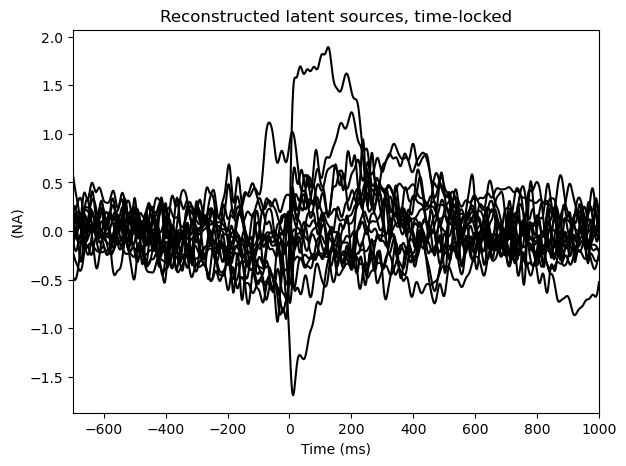

In [95]:
ica.plot_sources(eog_evoked)

Applying ICA to Evoked instance
    Transforming to ICA space (18 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components


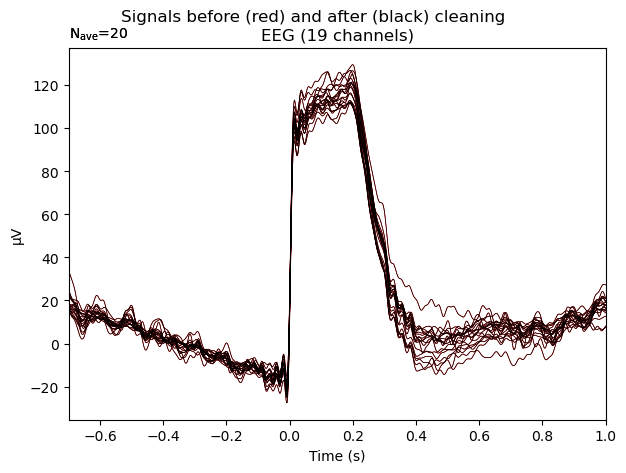

Channels marked as bad: none


In [56]:
ica.plot_overlay(eog_evoked)

In [97]:
epochs_cleaned = ica.apply(epochs.copy())

Applying ICA to Epochs instance
    Transforming to ICA space (17 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components


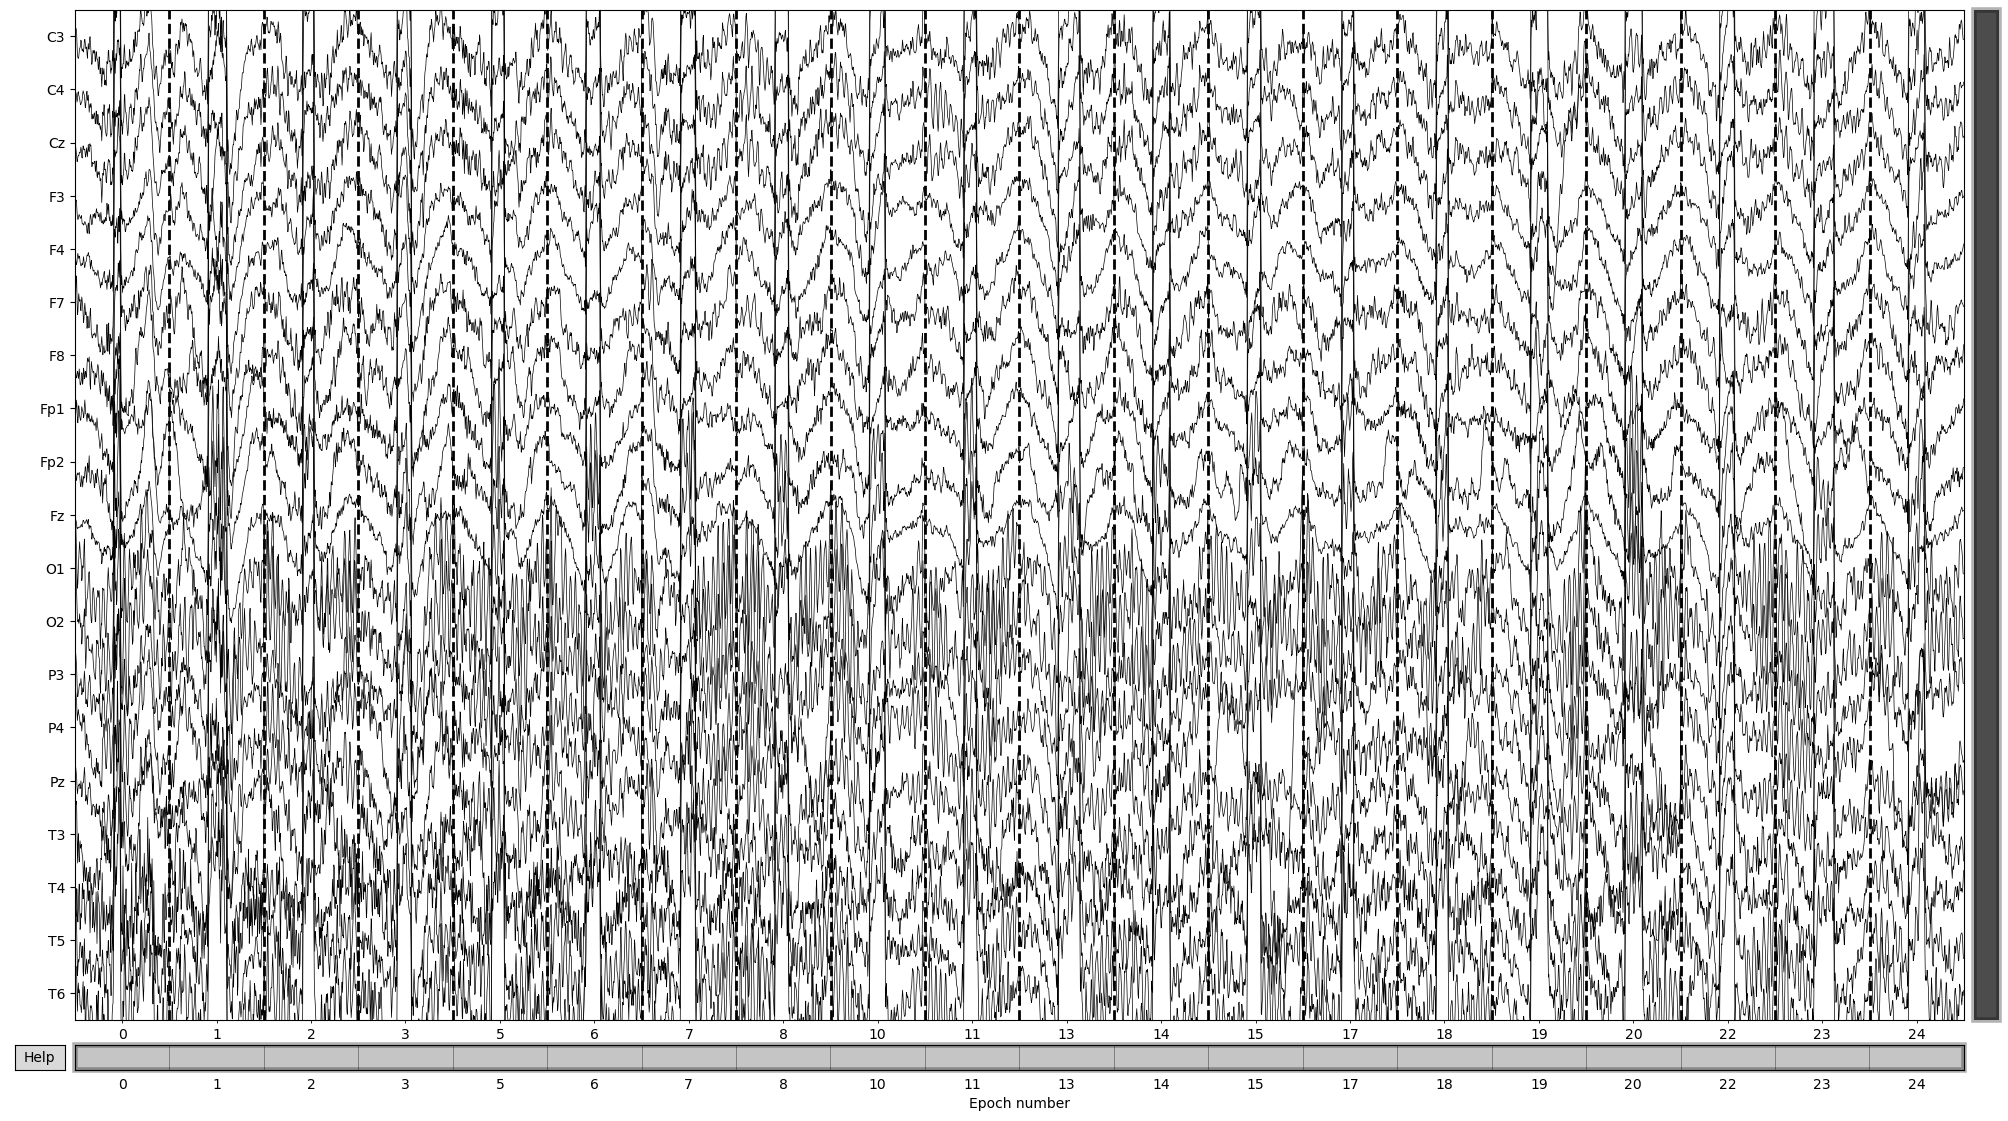

Dropped 0 epochs: 
Channels marked as bad: none
Dropped 0 epochs: 
Channels marked as bad: none


In [98]:
epochs_cleaned.plot(title='cleared')
epochs.plot(title='before')

In [59]:
# epochs['anger_'].plot_psd(fmin=2., fmax=40., average=True, bandwidth=2)
epochs['anger_'].plot_psd(fmin=2., fmax=40.,  bandwidth=2)

KeyError: 'Event "anger_" is not in Epochs. Event_ids must be one of "_Fear_, _Happyness_"'

No projector specified for this dataset. Please consider the method self.add_proj.
    Using multitaper spectrum estimation with 7 DPSS windows


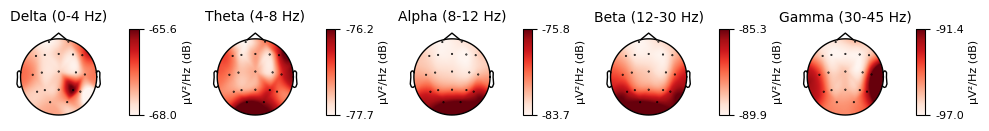

In [99]:
epochs.apply_proj()
# epochs['anger_'].plot_psd_topomap(ch_type='eeg', normalize=False)
# epochs['happy_'].plot_psd_topomap(ch_type='eeg', normalize=False)
# epochs['sad_'].plot_psd_topomap(ch_type='eeg', normalize=False)
epochs['_Happyness_'].plot_psd_topomap(ch_type='eeg', normalize=False)

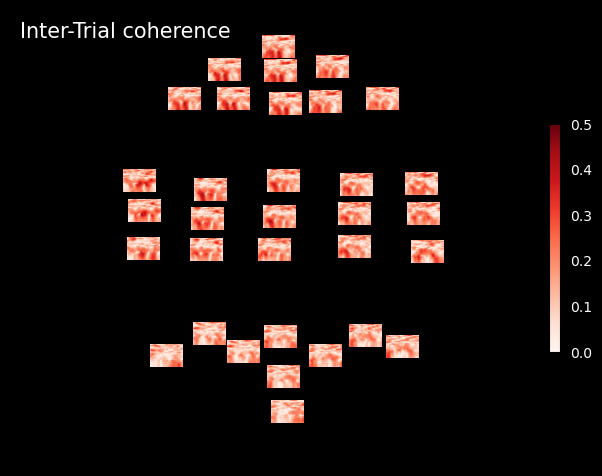

In [98]:
import numpy as np
# define frequencies of interest (log-spaced)
freqs = np.logspace(*np.log10([2, 30]), num=20)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                                           return_itc=True, decim=3, n_jobs=1)

Scaler(info=<Info | 8 non-empty values
 bads: []
 ch_names: A12, A13, A14, B3, B5, B6, B8, B10, B11, B12, B13, B22, B23, ...
 chs: 30 EEG
 custom_ref_applied: False
 dig: 214 items (214 EEG)
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: unspecified
 nchan: 30
 projs: []
 sfreq: 256.0 Hz
>,
    scalings=None, with_mean=True, with_std=True)

CV scores: [0.22222222 0.5        0.5        0.5        0.16666667]
Mean ROC AUC = 0.378 (SD = 0.151)


H:\Programs\Anaconda\envs\mne\lib\site-packages\mne\viz\utils.py:1016: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  Axes3D(fig)
H:\Programs\Anaconda\envs\mne\lib\site-packages\mne\viz\utils.py:1017: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


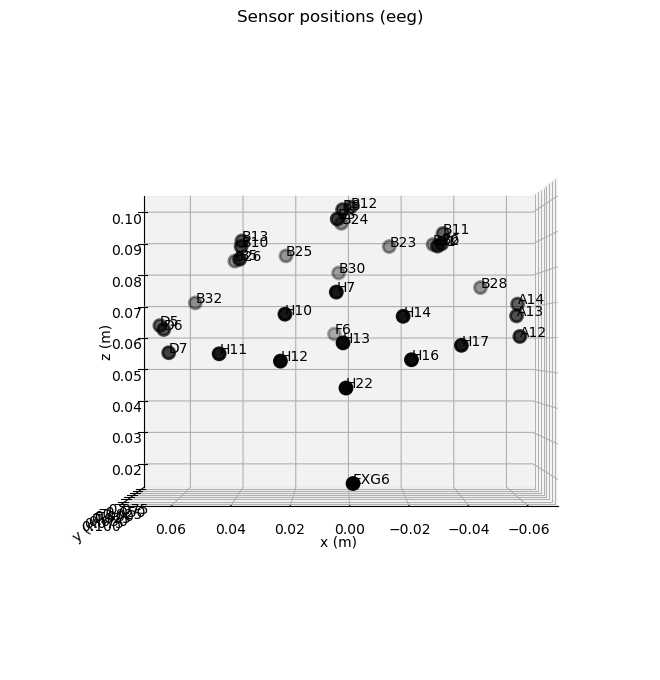

In [57]:
cop.plot_sensors(kind='3d', ch_type='eeg',show_names=True)
